In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('goalkeepers_rating_X.csv')
y = pd.read_csv('goalkeepers_rating_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   assists  shots_offtarget  shotsblocked  chances2score  drib_success  \
0      0.0              0.0           0.0            0.0           0.0   
1      0.0              0.0           0.0            0.0           0.0   
2      0.0              0.0           0.0            0.0           0.0   
3      0.0              0.0           0.0            0.0           0.0   
4      0.0              0.0           0.0            0.0           0.0   

   drib_unsuccess  keypasses   touches  passes_acc  passes_inacc  ...  \
0             0.0        0.0  0.300000    0.181818      0.352941  ...   
1             0.0        0.0  0.114286    0.163636      0.117647  ...   
2             0.0        0.0  0.357143    0.218182      0.411765  ...   
3             0.0        0.0  0.357143    0.272727      0.235294  ...   
4             0.0        0.0  0.271429    0.200000      0.352941  ...   

   owngoals  degree_centrality  betweenness_centrality  closeness_centrality  \
0       0.0           0.529412      

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X.dtypes

assists                   float64
shots_offtarget           float64
shotsblocked              float64
chances2score             float64
drib_success              float64
drib_unsuccess            float64
keypasses                 float64
touches                   float64
passes_acc                float64
passes_inacc              float64
crosses_acc               float64
crosses_inacc             float64
lballs_acc                float64
lballs_inacc              float64
grduels_w                 float64
grduels_l                 float64
aerials_w                 float64
aerials_l                 float64
poss_lost                 float64
fouls                     float64
wasfouled                 float64
clearances                float64
stop_shots                float64
interceptions             float64
tackles                   float64
dribbled_past             float64
tballs_acc                float64
tballs_inacc              float64
ycards                    float64
dangmistakes  

In [5]:
import pandas as pd

# Assuming X_train_corr is your DataFrame
df = X

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:


In [6]:
X.shape

(1571, 46)

In [7]:
X.columns

Index(['assists', 'shots_offtarget', 'shotsblocked', 'chances2score',
       'drib_success', 'drib_unsuccess', 'keypasses', 'touches', 'passes_acc',
       'passes_inacc', 'crosses_acc', 'crosses_inacc', 'lballs_acc',
       'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w', 'aerials_l',
       'poss_lost', 'fouls', 'wasfouled', 'clearances', 'stop_shots',
       'interceptions', 'tackles', 'dribbled_past', 'tballs_acc',
       'tballs_inacc', 'ycards', 'dangmistakes', 'countattack', 'goals_ag_otb',
       'goals_ag_itb', 'saves_itb', 'saves_otb', 'saved_pen', 'owngoals',
       'degree_centrality', 'betweenness_centrality', 'closeness_centrality',
       'flow_centrality', 'betweenness2goals', 'game_duration', 'year',
       'month', 'day'],
      dtype='object')

In football (soccer), player positions are grouped into four main categories: Goalkeepers, Defenders, Midfielders, and Forwards. Each of the columns you mentioned in your dataset corresponds to a specific position within these categories. Here’s a detailed breakdown:

Goalkeepers (GK)
GK (Goalkeeper): The primary role is to prevent the opposing team from scoring by guarding the goal. Goalkeepers are the only players allowed to use their hands, but only within the penalty area.
Defenders
LB (Left Back): A defender positioned on the left side, responsible for preventing opposition attacks down the right wing.
LCB (Left Center Back): A central defender on the left side of the defense.
CB (Center Back): Central defenders who protect the area directly in front of the goal.
RCB (Right Center Back): A central defender on the right side of the defense.
RB (Right Back): A defender positioned on the right side, responsible for preventing opposition attacks down the left wing.
LWB (Left Wing Back): Similar to a left back but with more offensive duties, often seen in formations with three central defenders.
RWB (Right Wing Back): Similar to a right back but with more offensive duties, often seen in formations with three central defenders.
Midfielders
CDM (Center Defensive Midfielder): Positioned in front of the defenders, focusing on intercepting the ball and breaking up opposition plays.
LDM (Left Defensive Midfielder): A defensive midfielder on the left side.
RDM (Right Defensive Midfielder): A defensive midfielder on the right side.
CM (Center Midfielder): Plays centrally, linking defense and attack, often covering both defensive and offensive roles.
LCM (Left Center Midfielder): A central midfielder leaning towards the left.
RCM (Right Center Midfielder): A central midfielder leaning towards the right.
CAM (Center Attacking Midfielder): Positioned behind the forwards, focusing on creating scoring opportunities.
LAM (Left Attacking Midfielder): An attacking midfielder on the left side.
RAM (Right Attacking Midfielder): An attacking midfielder on the right side.
LM (Left Midfielder): Positioned on the left side of the midfield, balancing defense and attack.
RM (Right Midfielder): Positioned on the right side of the midfield, balancing defense and attack.
Forwards
ST (Striker): The primary goal-scorer, positioned closest to the opponent's goal.
LS (Left Striker): A forward on the left side of the attack.
RS (Right Striker): A forward on the right side of the attack.
CF (Center Forward): Similar to a striker but may play slightly deeper, involved in both scoring and assisting.
LF (Left Forward): Positioned on the left side, slightly behind the main striker.
RF (Right Forward): Positioned on the right side, slightly behind the main striker.
LW (Left Winger): Positioned on the left wing, focused on delivering crosses and creating scoring opportunities from wide positions.
RW (Right Winger): Positioned on the right wing, focused on delivering crosses and creating scoring opportunities from wide positions.
These groupings ensure a balanced distribution of responsibilities on the field, with each position playing a crucial role in the team's overall strategy​ (Football Guide)​​ (Jobs In Football)​​ (Soccermodo)​.

https://www.football-guide.com/soccer-info/soccer-positions-explained.html

https://jobsinfootball.com/blog/soccer-positions/

https://soccermodo.com/soccer-positions/






In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature       Score
0             goals_ag_itb  561.398522
1                saves_itb  268.590100
2                saves_otb  225.106871
3             goals_ag_otb  143.855331
4                aerials_w  103.729763
5                saved_pen   78.435322
6               lballs_acc   22.090292
7                  touches   19.202619
8                grduels_l   17.935265
9             dangmistakes   17.317799
10            lballs_inacc   16.321005
11               poss_lost   15.562308
12               wasfouled   14.482449
13            passes_inacc   14.238256
14  betweenness_centrality   14.176096
15             countattack   11.846157
16    closeness_centrality    5.386309
17         flow_centrality    4.317608
18            tballs_inacc    4.096128
19                    year    2.996396
20                 tackles    2.531700
21                owngoals    2.519409
22               grduels_w    2.489867
23                 assists    2.354955
24              clearance

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Perform feature selection using SelectKBest with mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                   Feature     Score
0             goals_ag_itb  0.172762
1                saves_itb  0.094331
2                saves_otb  0.091851
3                aerials_w  0.037449
4                saved_pen  0.034481
5             goals_ag_otb  0.022749
6                poss_lost  0.022337
7                      day  0.021635
8               passes_acc  0.015245
9                wasfouled  0.013569
10            passes_inacc  0.011793
11           dribbled_past  0.009659
12       degree_centrality  0.007727
13            dangmistakes  0.007391
14               grduels_l  0.007228
15    closeness_centrality  0.006999
16              clearances  0.005436
17               grduels_w  0.004698
18           interceptions  0.004270
19            drib_success  0.002893
20                owngoals  0.002474
21              lballs_acc  0.002464
22                 touches  0.002118
23                 tackles  0.001735
24            tballs_inacc  0.001338
25             crosses_acc  0.000405
2

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Feature  Importance
0             goals_ag_itb    0.314261
1                saves_itb    0.209201
2                saves_otb    0.112104
3             goals_ag_otb    0.089056
4                saved_pen    0.037921
5                aerials_w    0.029492
6   betweenness_centrality    0.013518
7            interceptions    0.013154
8               lballs_acc    0.012058
9                      day    0.011668
10    closeness_centrality    0.011429
11       degree_centrality    0.011415
12         flow_centrality    0.011062
13              passes_acc    0.009568
14                   month    0.009162
15              clearances    0.009134
16                 touches    0.008861
17            lballs_inacc    0.008549
18            passes_inacc    0.008543
19               poss_lost    0.008317
20                    year    0.007889
21             countattack    0.007836
22            dangmistakes    0.007313
23               grduels_l    0.005425
24               wasfoule

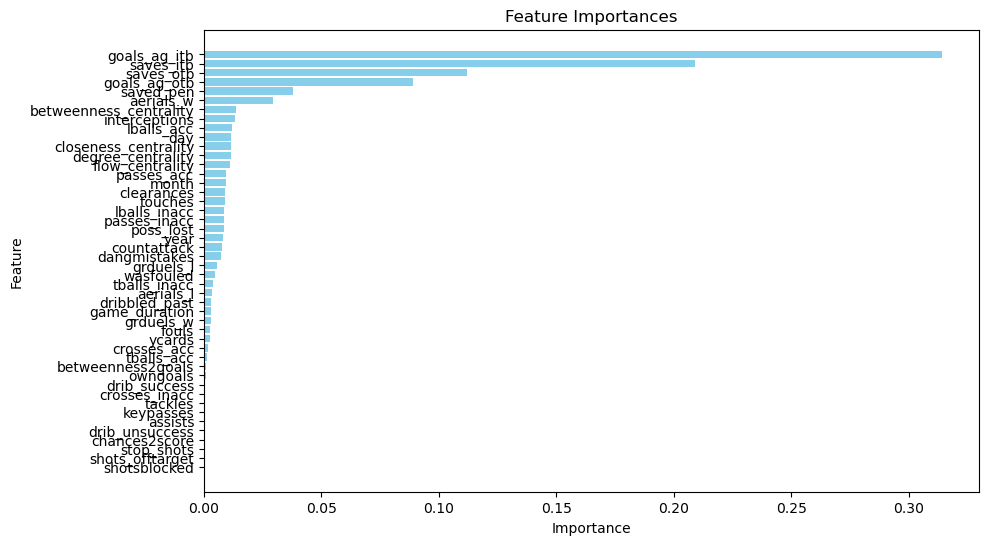

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Fit an ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [11]:
import pandas as pd

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
data.corr()

,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,dangmistakes,countattack,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,year,month,day,original_rating
assists,1.000000,-0.001804,-0.000901,-0.002017,-0.002389,-0.001562,-0.002710,-0.002567,-0.016780,0.046075,-0.003034,-0.002097,0.026051,0.048909,-0.009336,-0.008734,0.126480,-0.005924,0.039643,-0.007655,0.033647,-0.019533,-0.001804,-0.030993,-0.003734,-0.006425,0.299601,0.067883,-0.006671,-0.006478,-0.013731,-0.014190,-0.005569,-0.002781,-0.013091,-0.005917,-0.002389,-0.062331,0.010613,-0.072541,-0.029752,0.441200,-0.003622,-0.024713,0.032065,0.004197,0.038713
shots_offtarget,-0.001804,1.000000,0.499522,0.894142,-0.003380,-0.002210,-0.003835,0.043264,0.048897,-0.000369,-0.004294,-0.002967,0.061535,-0.012603,-0.013212,0.035702,0.006097,-0.008383,0.002217,0.049094,-0.018524,0.014601,-0.002553,-0.007364,-0.005284,-0.009092,-0.005467,-0.011656,-0.009441,0.060073,-0.019431,-0.020081,0.013764,-0.003935,0.028114,-0.008374,-0.003380,0.031529,0.044779,0.012675,0.022699,-0.005527,-0.005125,0.006650,-0.006481,0.016232,-0.016248
shotsblocked,-0.000901,0.499522,1.000000,0.446644,-0.001688,-0.001104,-0.001916,0.032259,0.017912,0.022492,-0.002145,-0.001482,0.007461,0.003922,-0.006600,0.089857,-0.014227,-0.004187,0.037811,0.114328,-0.009253,-0.013808,-0.001275,0.002398,-0.002640,-0.004542,-0.002731,-0.005823,-0.004716,0.133769,-0.009706,-0.010031,-0.003937,-0.010918,0.028021,-0.004183,-0.001688,0.046086,0.017104,0.024464,0.010479,-0.002761,-0.002560,-0.017469,0.008851,0.007374,-0.002790
chances2score,-0.002017,0.894142,0.446644,1.000000,-0.003780,-0.002472,-0.004289,0.049339,0.053436,-0.012823,-0.004802,-0.003319,0.063302,-0.023245,-0.014776,0.072179,0.014553,-0.009375,-0.011764,0.041502,0.008871,0.006881,-0.002855,-0.016399,-0.005910,-0.010169,-0.006114,-0.013036,-0.010558,0.051698,-0.021731,0.006821,0.010552,-0.008410,0.021010,-0.009365,-0.003780,0.020327,0.033252,0.006427,0.029058,-0.006181,-0.005732,-0.001873,0.004351,0.011247,-0.023271
drib_success,-0.002389,-0.003380,-0.001688,-0.003780,1.000000,-0.002926,-0.005078,0.018846,0.005201,0.032906,-0.005686,-0.003929,-0.025853,0.014265,0.127922,0.020000,0.001532,-0.011100,0.037220,0.030999,0.025516,-0.020620,-0.003380,-0.012052,-0.006997,-0.012039,-0.007239,0.025318,0.040433,0.092643,0.033043,-0.001828,-0.010435,0.004959,0.010760,-0.011088,-0.004476,-0.024413,-0.029029,-0.014644,-0.004055,-0.007318,-0.006786,0.016679,-0.005312,0.003971,0.014575
drib_unsuccess,-0.001562,-0.002210,-0.001104,-0.002472,-0.002926,1.000000,-0.003320,-0.012988,-0.014108,-0.007598,-0.003718,-0.002569,-0.012383,-0.016814,-0.011438,0.100257,-0.024657,-0.007257,0.003333,-0.009379,-0.016037,-0.023931,-0.002210,0.004156,-0.004575,-0.007872,-0.004733,-0.010092,-0.008173,-0.007937,-0.016822,0.020391,0.018162,0.032794,0.005497,-0.007250,-0.002926,-0.026553,-0.015493,-0.051152,-0.011603,-0.004785,-0.004437,-0.006254,0.015340,-0.026258,-0.025097
keypasses,-0.002710,-0.003835,-0.001916,-0.004289,-0.005078,-0.003320,1.000000,0.007827,0.014074,0.013759,0.080174,0.082005,0.048064,0.015210,0.044314,-0.018569,0.049564,-0.012594,0.005784,-0.016276,-0.005749,-0.027426,-0.003835,-0.009033,0.073581,-0.013660,0.063474,0.054415,-0.014183,0.078695,0.061572,-0.008318,0.002613,-0.014887,0.009539,-0.012581,-0.005078,0.011243,0.013724,-0.008568,0.003478,-0.008303,-0.007700,0.003043,-0.003388,-0.047532,0.004535
touches,-0.002567,0.043264,0.032259,0.049339,0.018846,-0.012988,0.007827,1.000000,0.832241,0.398142,0.009336,0.044967,0.470641,0.382893,0.105965,0.006663,0.103174,0.048738,0.413125,0.016522,

<Axes: >

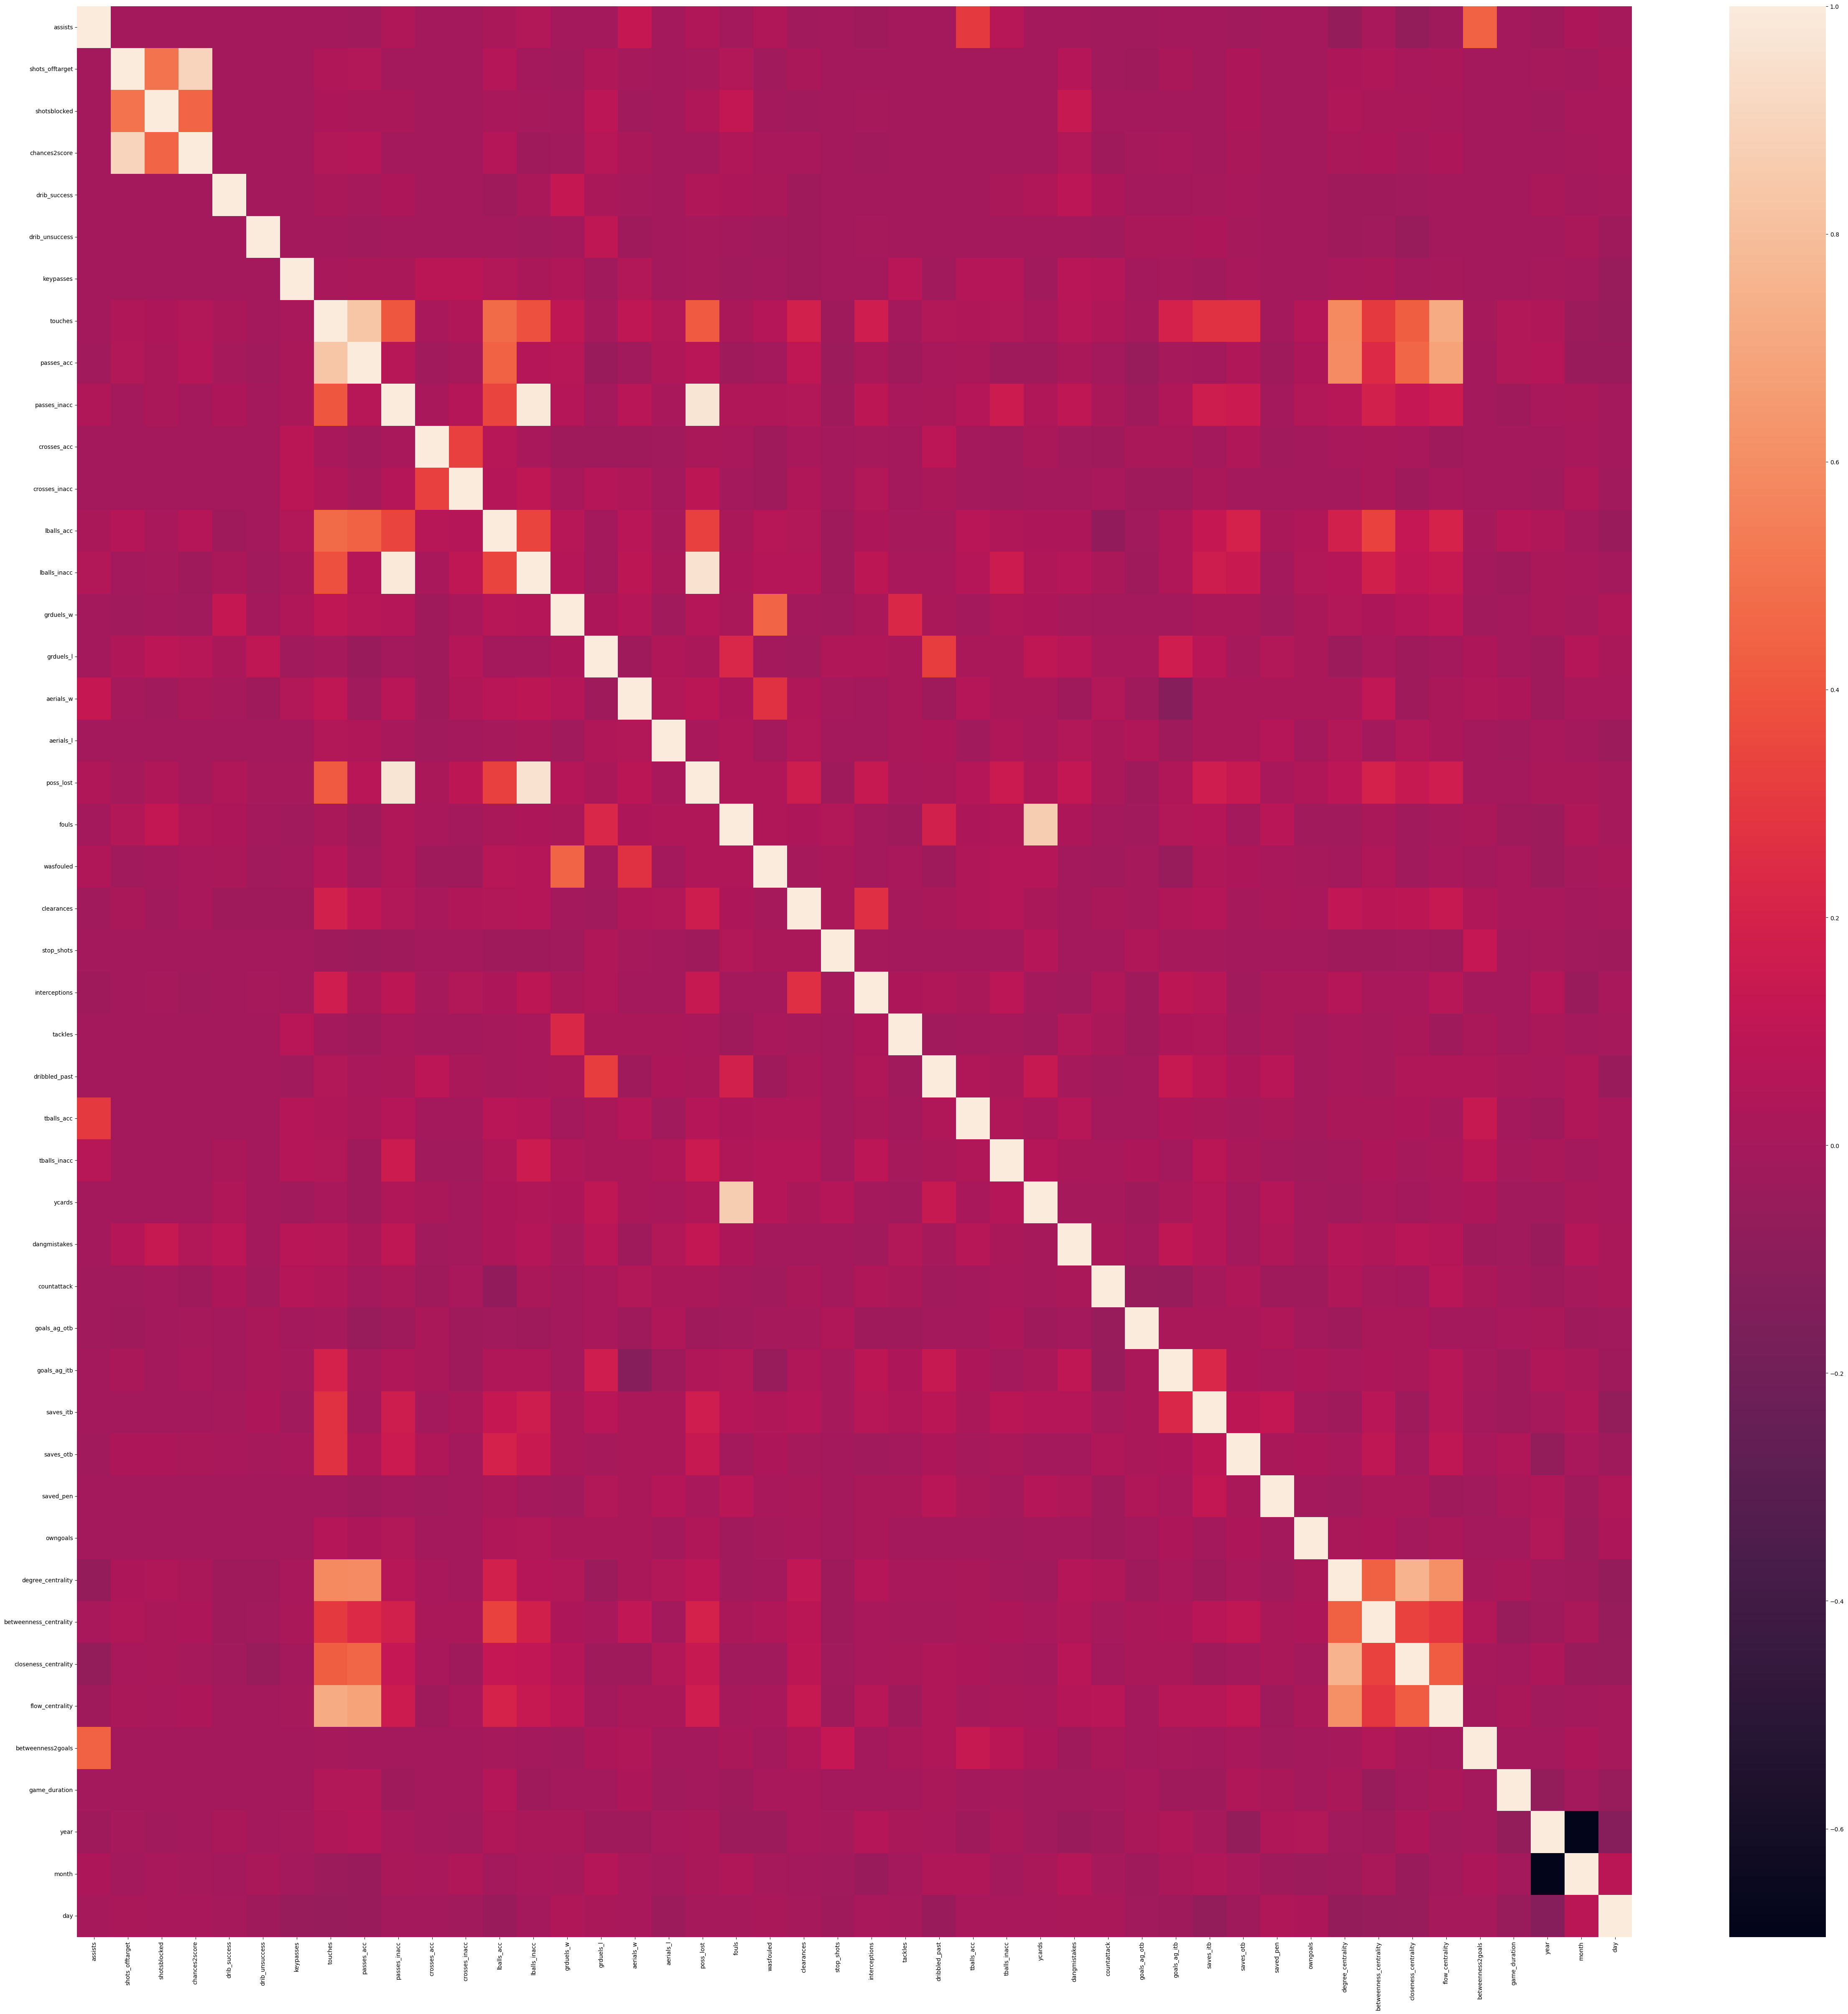

In [13]:
corr = data.drop(columns=['original_rating'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(data[top_features].corr(), annot=False)

In [14]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
threshold = 0.8
correlation(data.drop(columns=['original_rating'], axis=1), threshold)

{'chances2score', 'lballs_inacc', 'passes_acc', 'poss_lost', 'ycards'}

In [17]:
#check the columns to know which other they are correlated with
def correlated_columns(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                correlated_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

    return col_corr, correlated_pairs

In [18]:
threshold = 0.8
col_corr, correlated_pairs = correlated_columns(data.drop(columns=['original_rating'], axis=1), threshold)

print("Highly correlated columns:")
print(col_corr)

print("\nPairs of highly correlated columns with their correlation coefficients:")
for pair in correlated_pairs:
    print(pair)

Highly correlated columns:
{'lballs_inacc', 'touches', 'fouls', 'passes_acc', 'shots_offtarget', 'poss_lost', 'ycards', 'chances2score', 'passes_inacc'}

Pairs of highly correlated columns with their correlation coefficients:
('chances2score', 'shots_offtarget', 0.8941417506891518)
('passes_acc', 'touches', 0.8322408109798062)
('lballs_inacc', 'passes_inacc', 0.9862715060102366)
('poss_lost', 'passes_inacc', 0.9701843828302437)
('poss_lost', 'lballs_inacc', 0.9577463986195669)
('ycards', 'fouls', 0.8631837083976014)


In [19]:
# Save X and y to CSV files
#change to goalkeeprs features later
#X.to_csv('defenders_featusres.csv', index=False)
#y.to_csv('defenders_target.csv', index=False)

#print("Files saved: 'defenders_features.csv' and 'defenders_target.csv'")

In [ ]:
#for feature enginnering, we can do averages of players of different matches in the same season